In [13]:
include("../src/cobravmec.jl")
using VMEC
using CairoMakie

# Eigenvalue Plots
## Max Ruth

The goal of this notebook is to plot the ballooning eigenvalue over a bunch of different surfaces. The goal here is just to gain some intuition over what I expect the eigenvalues to look like as a function of position. We will do this for multiple example stellarator configurations. We begin with a block that loads the configurations:

In [2]:
file = 2;
Nθ = 80;
Nζ = 80;
Ns = 10;
nwells = 10;
lscreen = false;

Lα = 2pi
Lζ = 2pi

θs    = LinRange(0.0, Lα*(1-1/Nθ), Nθ);
ζs    = LinRange(0.0, Lζ*(1-1/Nζ), Nζ);
surfs = LinRange(1/(Ns+1), 1*(1-1/(Ns+1)), Ns);

if file == 1
    vmec = VMEC.readVmecWout("wout_wista_15_beta_0.nc");
elseif file == 2
    vmec = VMEC.readVmecWout("wout_ku4.nc");
end;

dir = "./F"*string(file)*"Ns"*string(Ns)*"Ntheta"*string(Nθ)*"Nzeta"*string(Nζ)*"/"
try 
    mkdir(dir); 
catch
end

Then, we run cobra:

In [5]:
balloonGrowth, mercier, pres = cobravmec.cobra(vmec, surfs, nwells; θs, ζs, lscreen);

wout file read successfully!
i_s = 1/10
i_s = 2/10
i_s = 3/10
i_s = 4/10
i_s = 5/10
i_s = 6/10
i_s = 7/10
i_s = 8/10
i_s = 9/10
i_s = 10/10


Then, we plot!

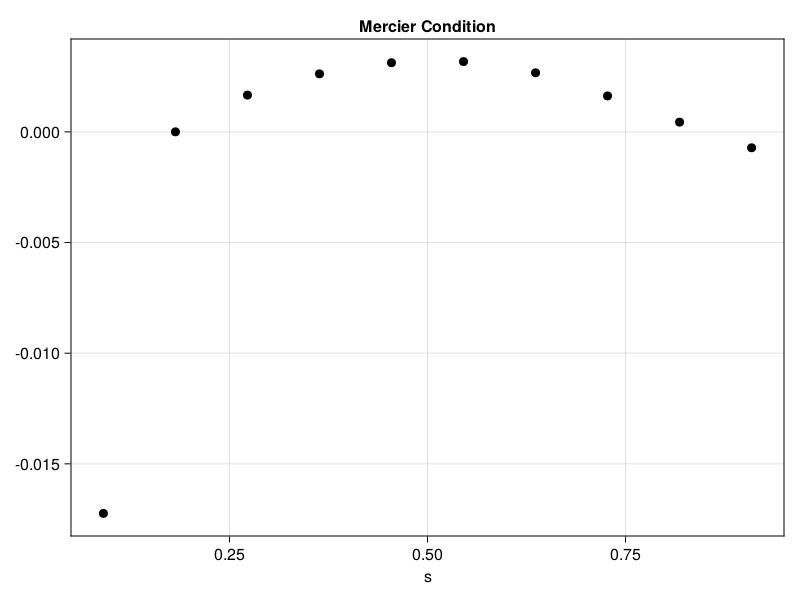

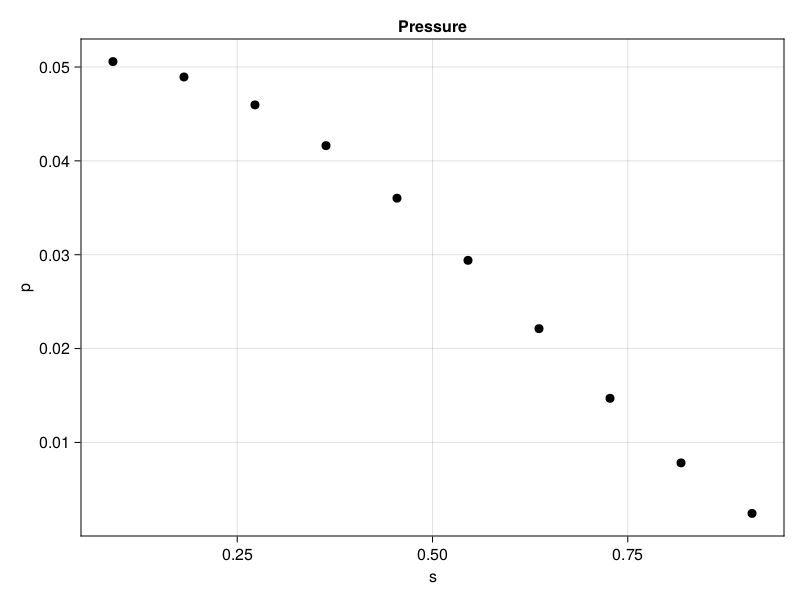

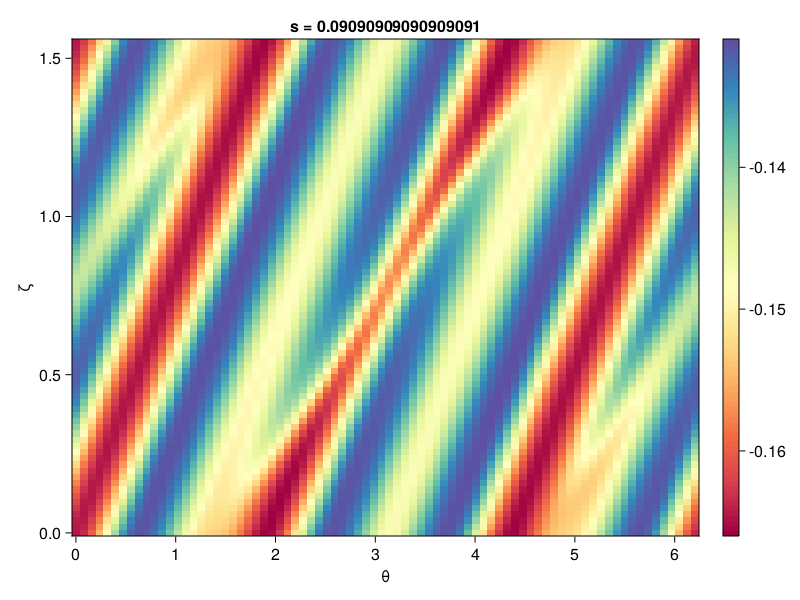

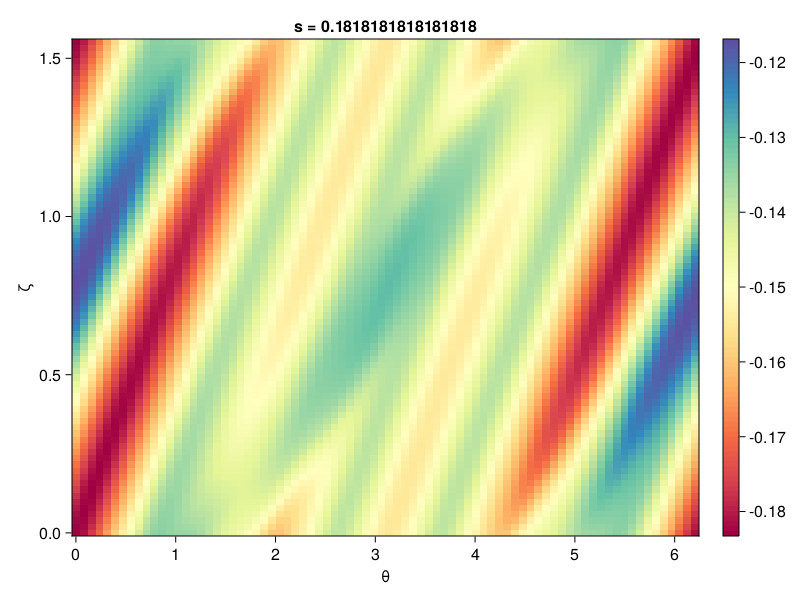

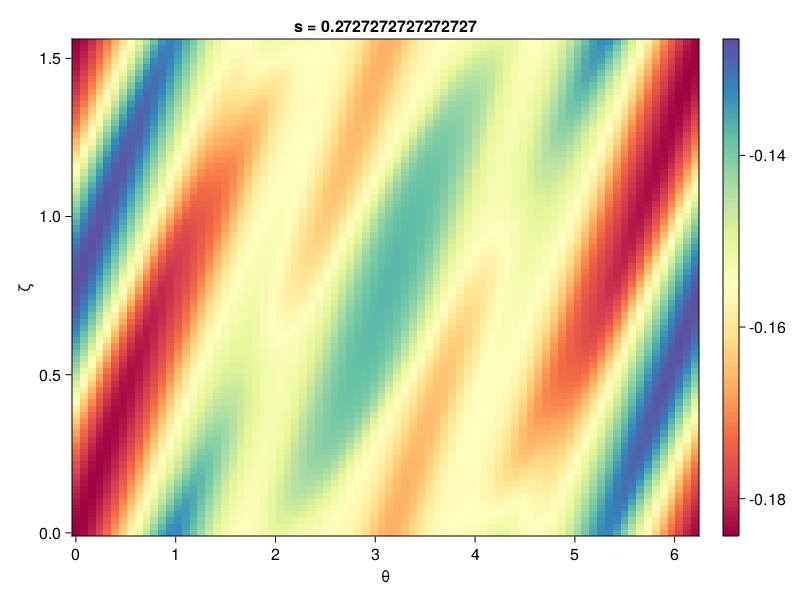

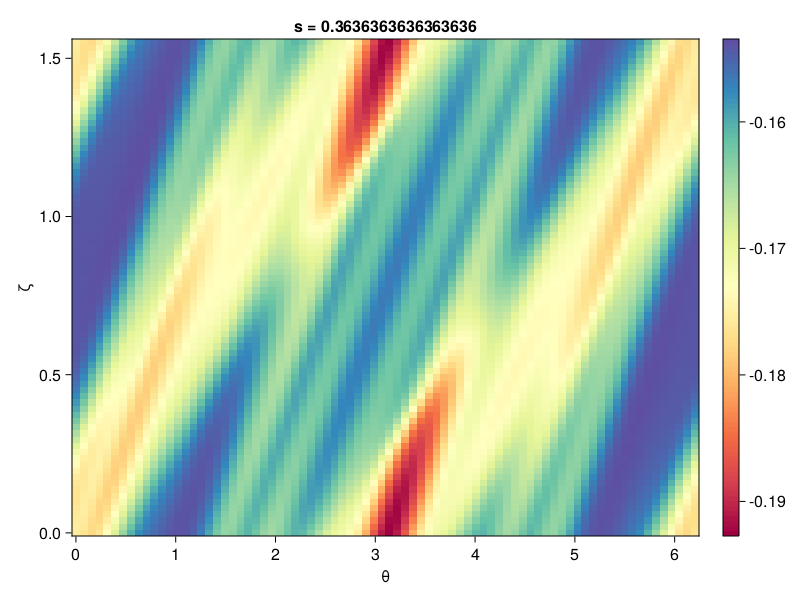

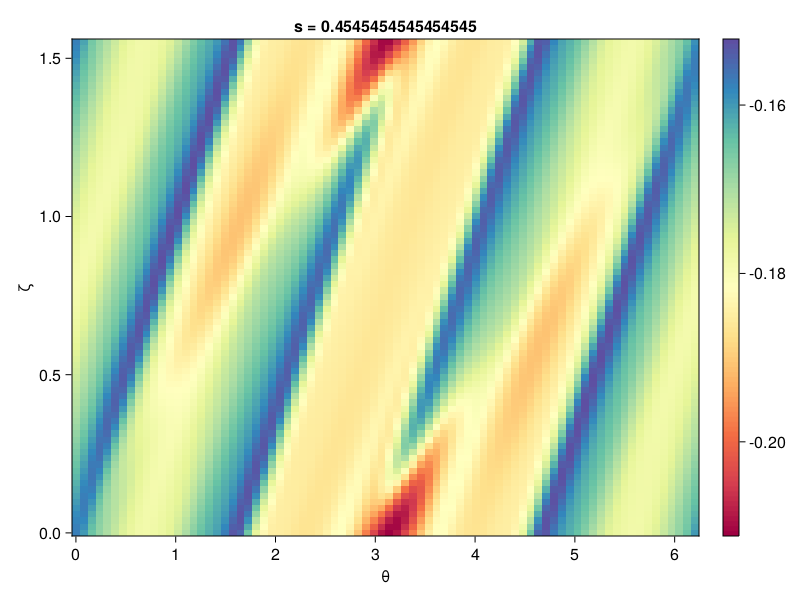

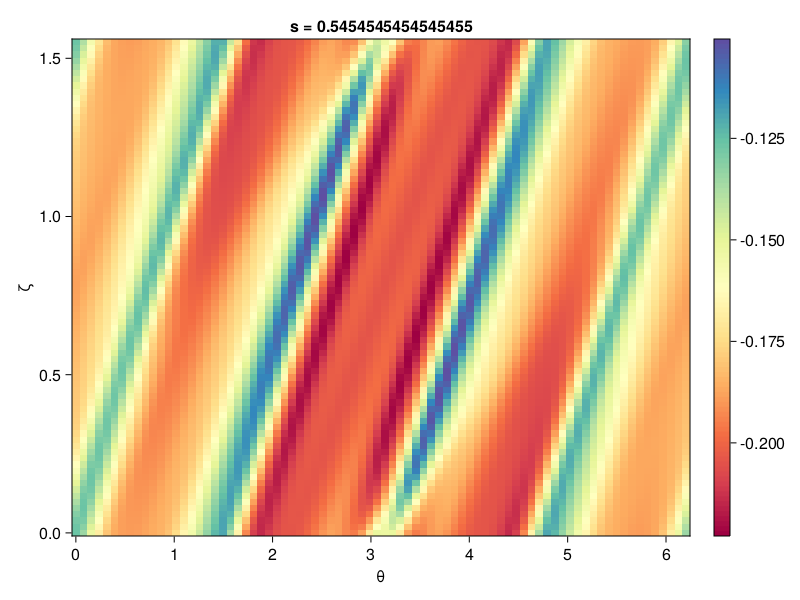

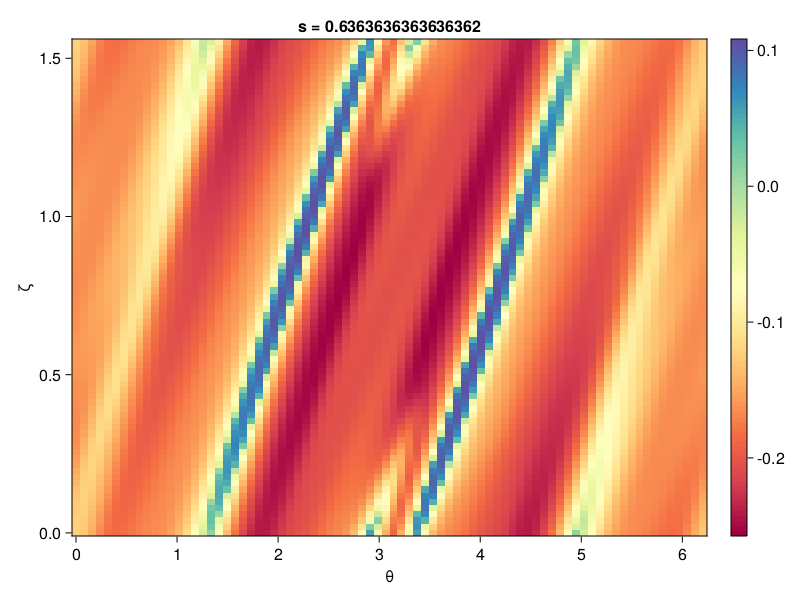

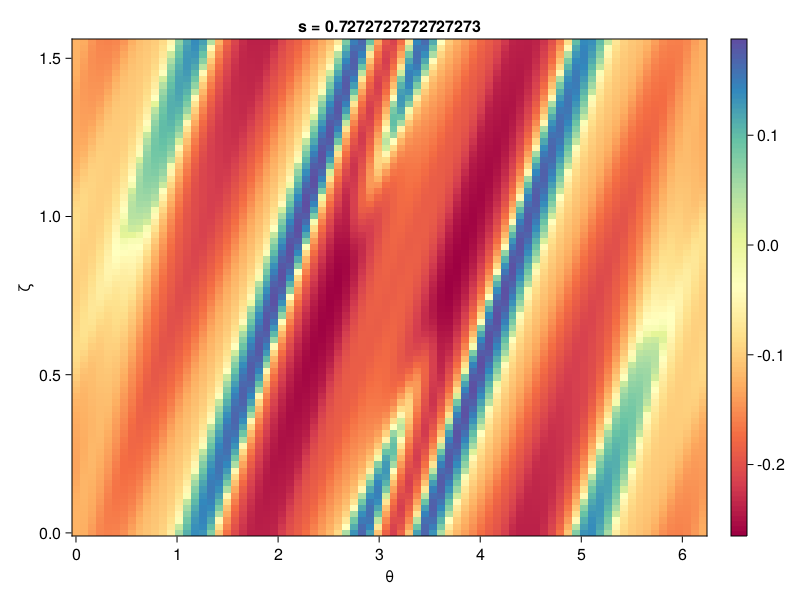

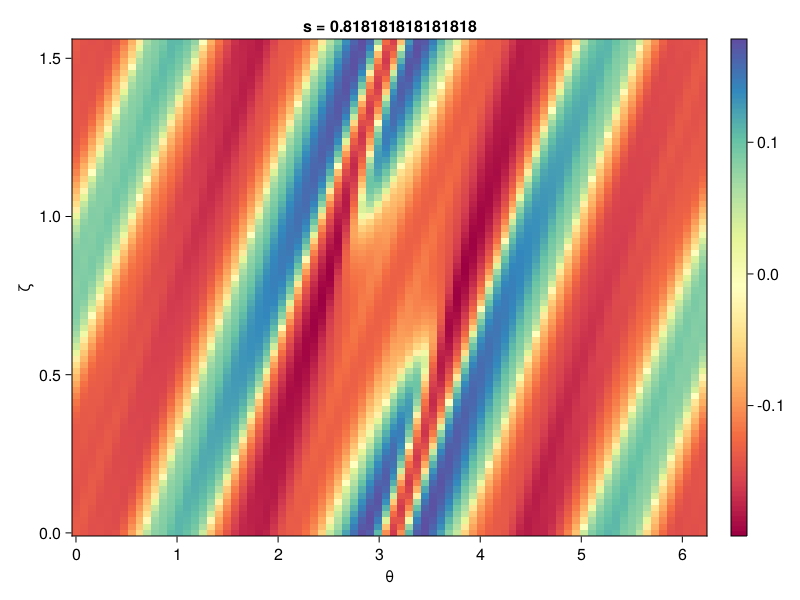

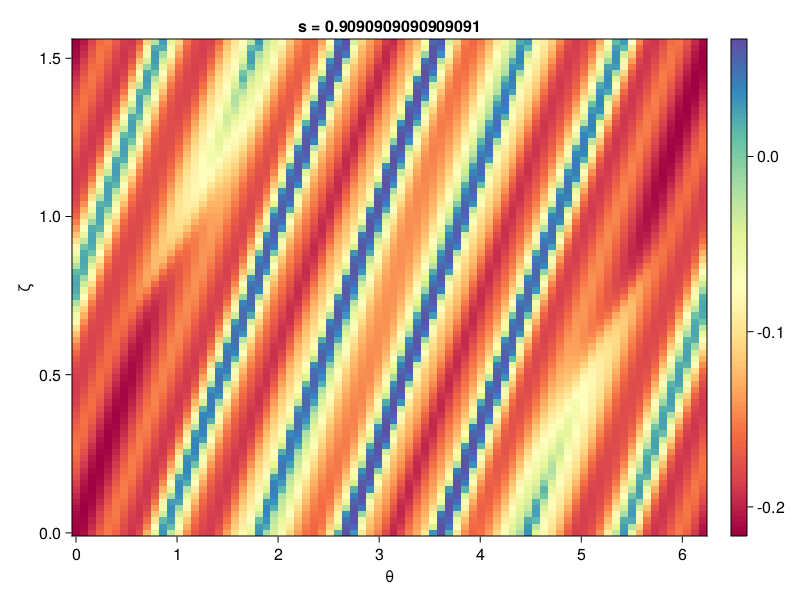

In [6]:
f = Figure();
ax = Axis(f[1, 1], xlabel = "s", title = "Mercier Condition")
plot!(surfs, mercier);
save(dir*"Mercier.png", f)
display(f)

f = Figure();
ax = Axis(f[1, 1], xlabel = "s", ylabel = "p", title = "Pressure")
plot!(surfs, pres);
save(dir*"Pressure.png", f)
display(f)

# balloonGrowth_plots = Vector{Plots.Plot}(undef, Ns);
nfp = vmec.nfp;
for i_s = 1:Ns
    f = Figure()
    ax = Axis(f[1, 1], xlabel = "θ", ylabel = "ζ", title = "s = "*string(surfs[i_s]))

    hm = heatmap!(θs, ζs./nfp, balloonGrowth[i_s, : ,:], colormap = :Spectral)
    Colorbar(f[1,2], hm)
    display(f);

    save(dir*string(i_s)*".png", f)
    # balloonGrowth_plots[i_s] = p;
end

We can then find the maximal eigenvalues using `cobra_opt`:

In [14]:
θsmax = (0:4-1) .* (2π/4)
ζsmax = (0:4-1) .* (2π/4)
balloonGrowthMax, balloonGrowthLoc = cobravmec.cobra_opt(vmec, surfs, nwells; θs=θsmax, ζs=ζsmax);

i_s = 1/10
i_s = 2/10
i_s = 3/10
i_s = 4/10
i_s = 5/10
i_s = 6/10
i_s = 7/10
i_s = 8/10
i_s = 9/10
i_s = 10/10


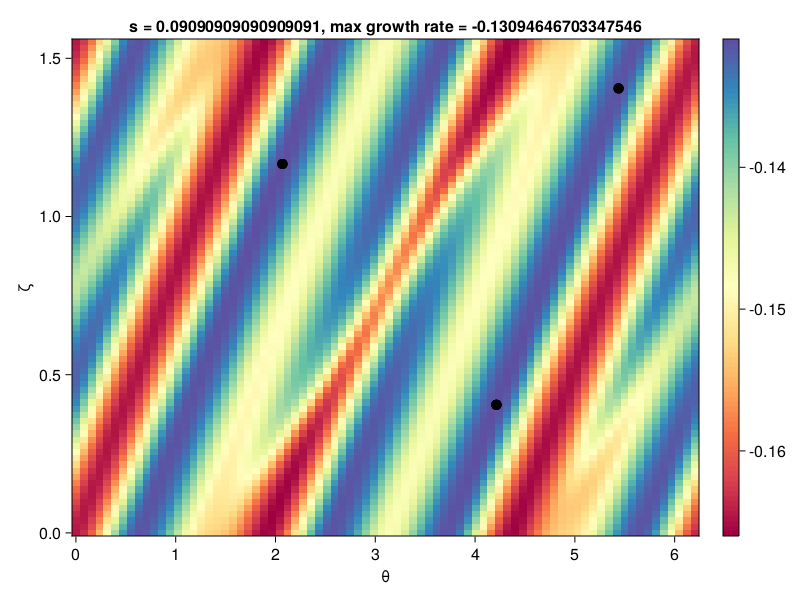

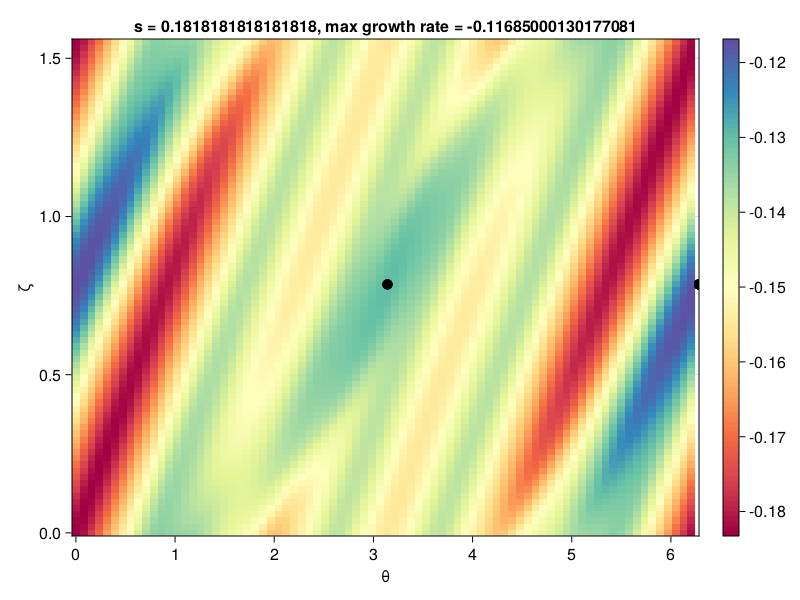

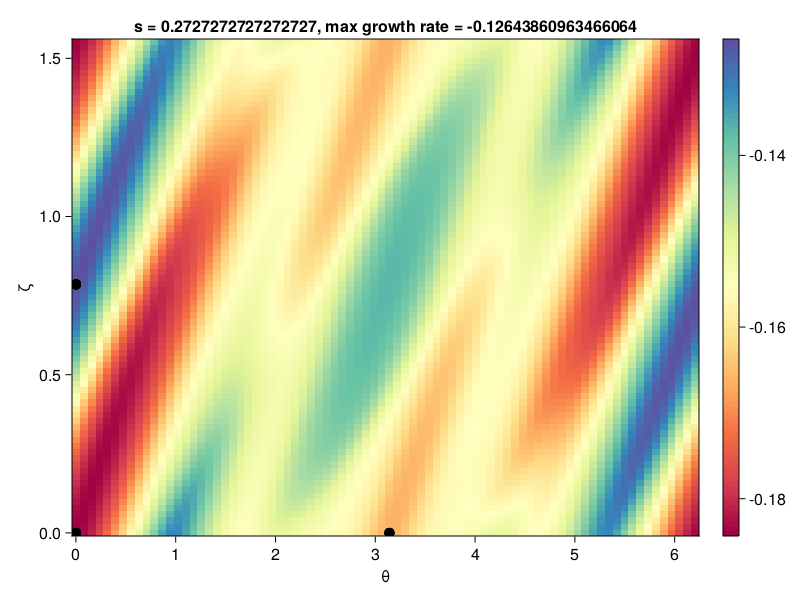

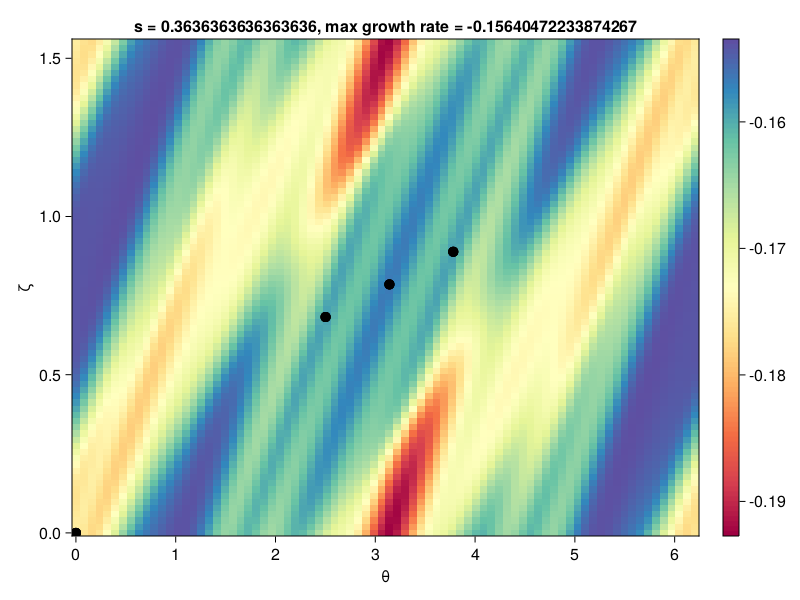

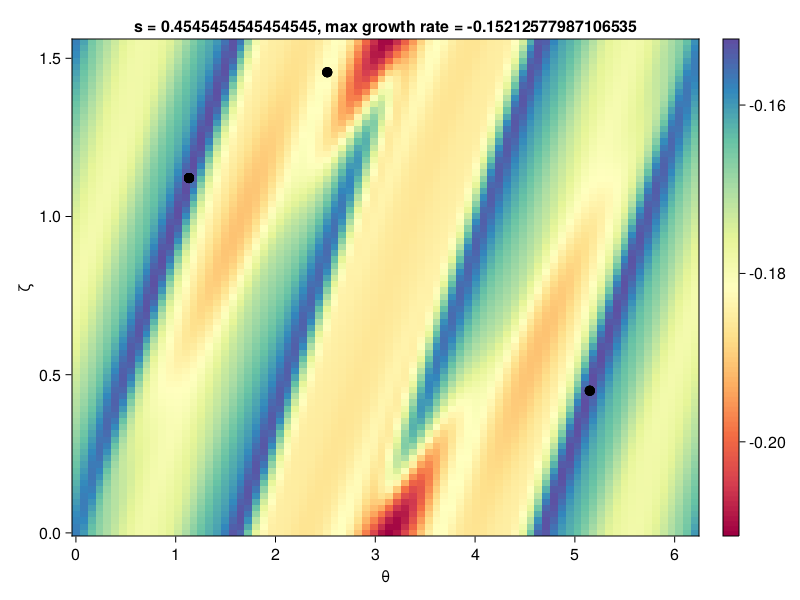

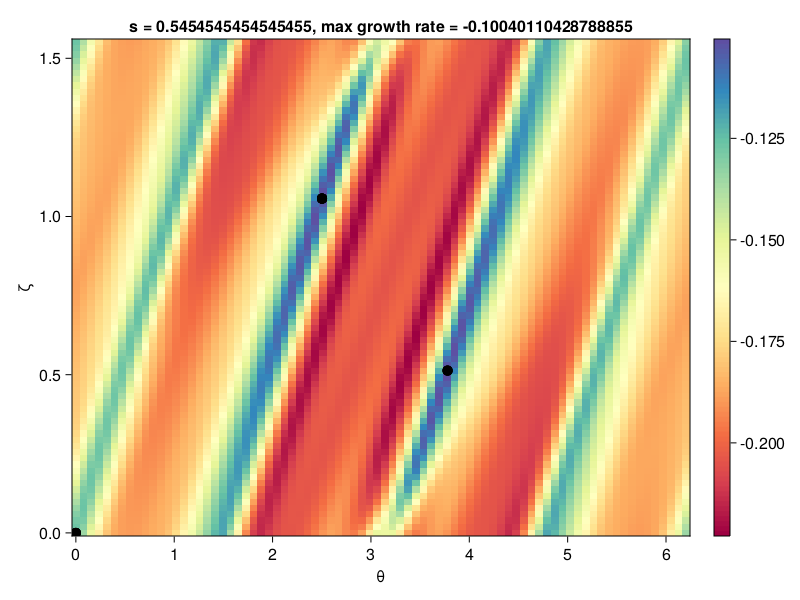

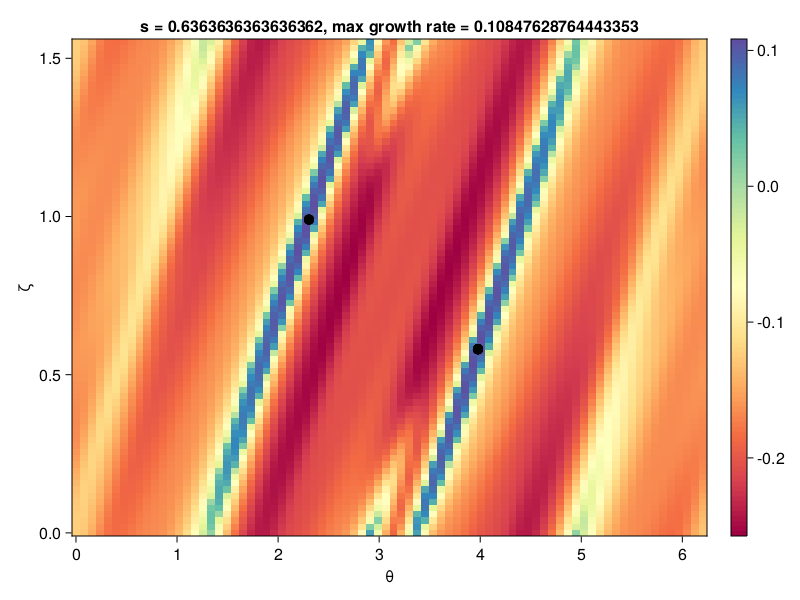

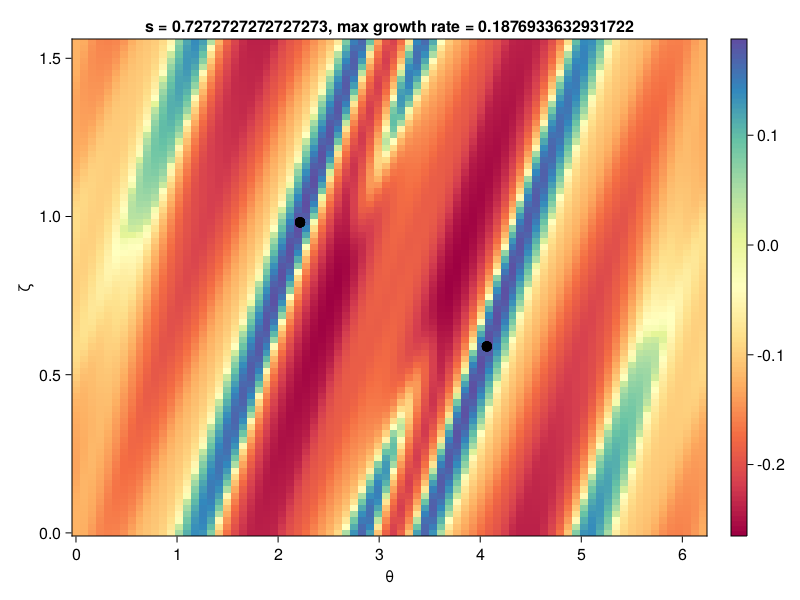

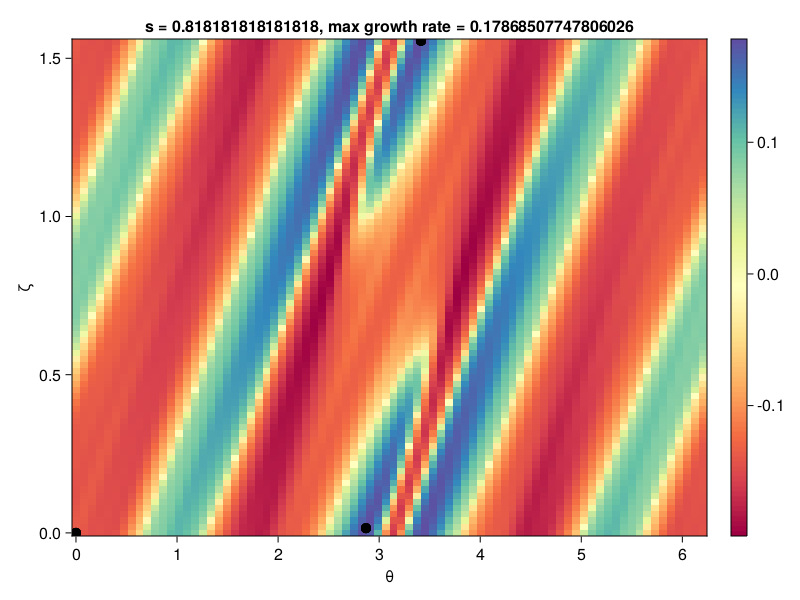

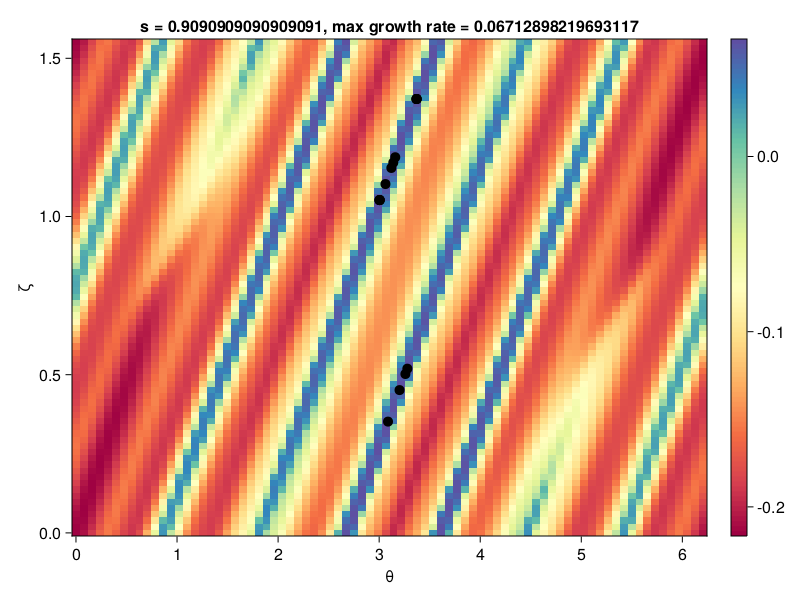

In [16]:
nfp = vmec.nfp;
for i_s = 1:Ns
    f = Figure()
    ax = Axis(f[1, 1], xlabel = "θ", ylabel = "ζ", title = "s = "*string(surfs[i_s])*", max growth rate = "*string(maximum(balloonGrowthMax[i_s,:,:])))

    hm = heatmap!(θs, ζs./nfp, balloonGrowth[i_s, : ,:], colormap = :Spectral)
    Colorbar(f[1,2], hm)
    # display(f);
    
    xbg = vec(balloonGrowthLoc[1, i_s, :, :]);
    ybg = vec(balloonGrowthLoc[2, i_s, :, :]);
    scatter!(xbg, ybg, markersize=10, color=:black)
    init_grid = vec([(θ,ζ/nfp) for θ in θsmax, ζ in ζsmax]);
    display(f)

    save(dir*string(i_s)*"_with_max.png", f)
    # balloonGrowth_plots[i_s] = p;
end